# EDA with klib

## Klib

**klib is a Python library for importing, cleaning, analyzing and preprocessing data.** Explanations on key functionalities can be found on Medium / TowardsDataScience.

### klib.describe - functions for visualizing datasets
- klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features
- klib.corr_mat(df) # returns a color-encoded correlation matrix
- klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations
- klib.dist_plot(df) # returns a distribution plot for every numeric feature
- klib.missingval_plot(df) # returns a figure containing information about missing values

### klib.clean - functions for cleaning datasets
- klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
- klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()
- klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
- klib.drop_missing(df) # drops missing values, also called in data_cleaning()
- klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content
- klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information

[see documentation](https://pypi.org/project/klib/)


In [1]:
!pip install klib

## Setup

In [8]:
import pandas as pd
import numpy as np

import klib 

In [4]:
data = pd.read_csv("Insurance_multiple_regression.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA

In [9]:
klib.corr_mat(data)

,age,bmi,children,charges
age,1.00,0.11,0.04,0.30
bmi,0.11,1.00,0.01,0.20
children,0.04,0.01,1.00,0.07
charges,0.30,0.20,0.07,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

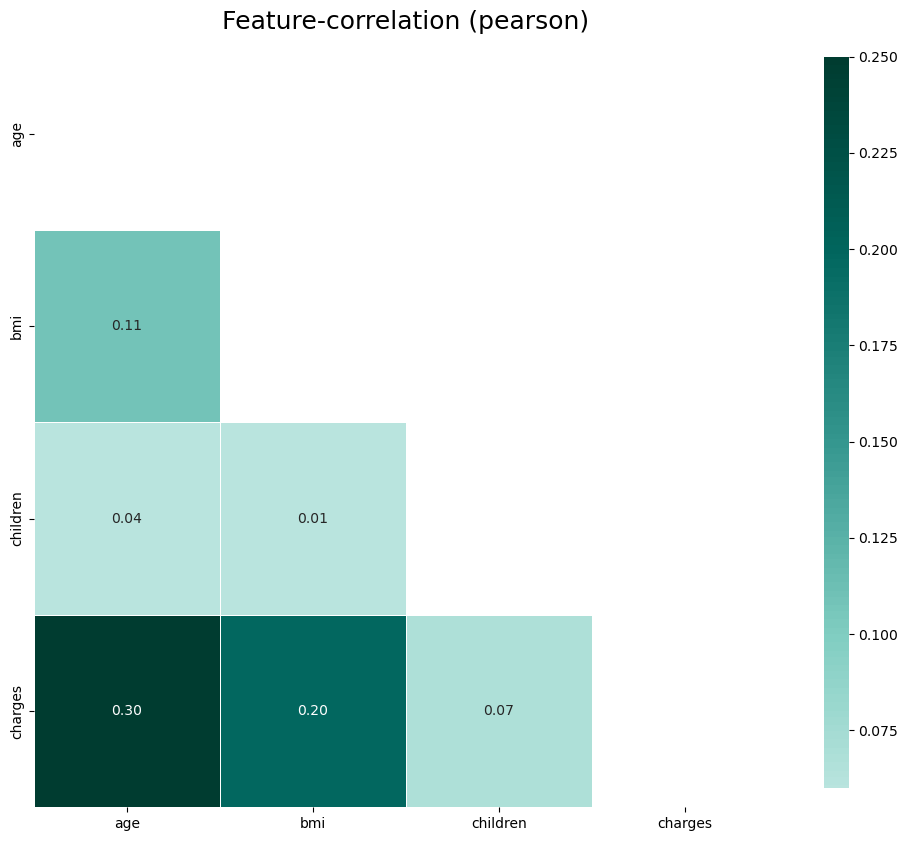

In [12]:
klib.corr_plot(data,)

<Axes: xlabel='charges', ylabel='Density'>

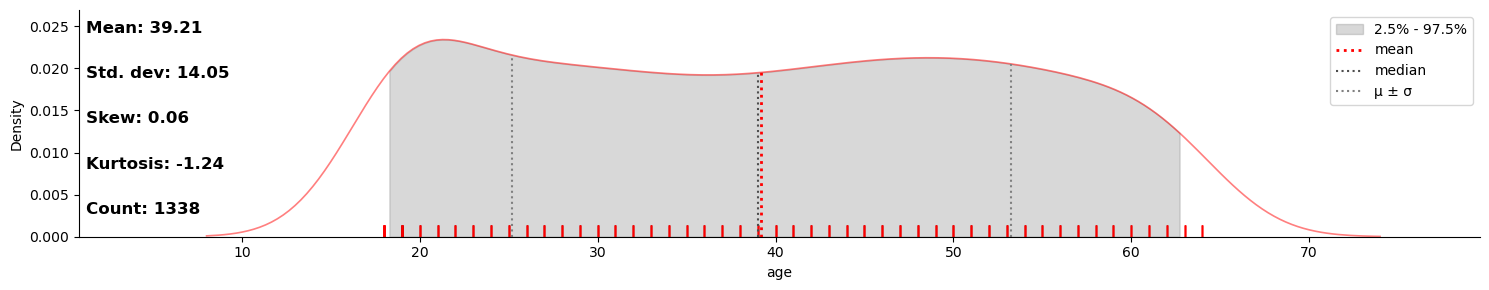

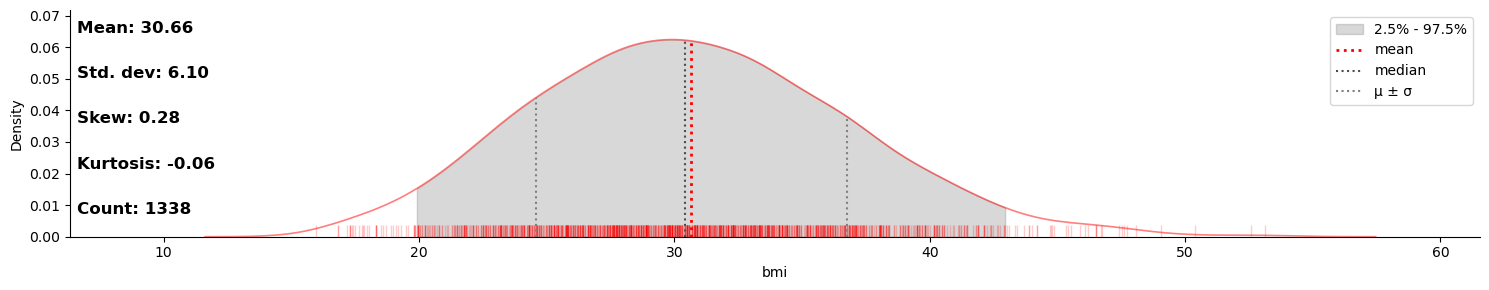

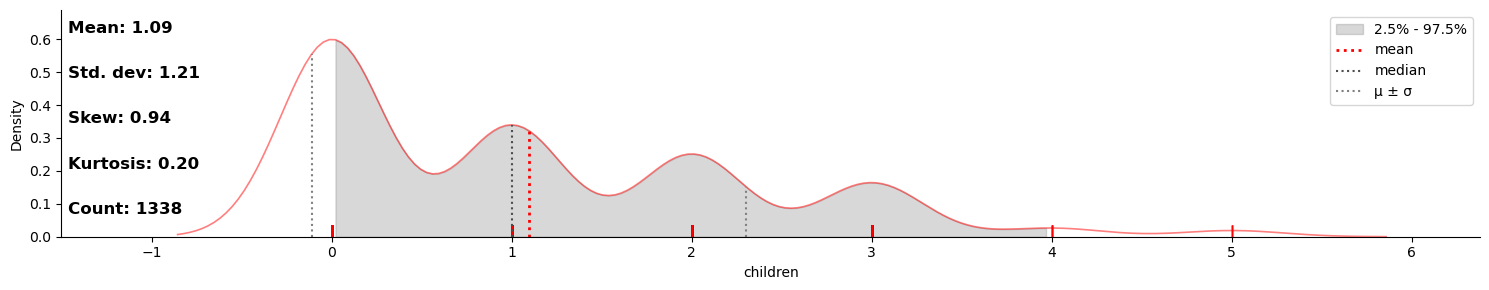

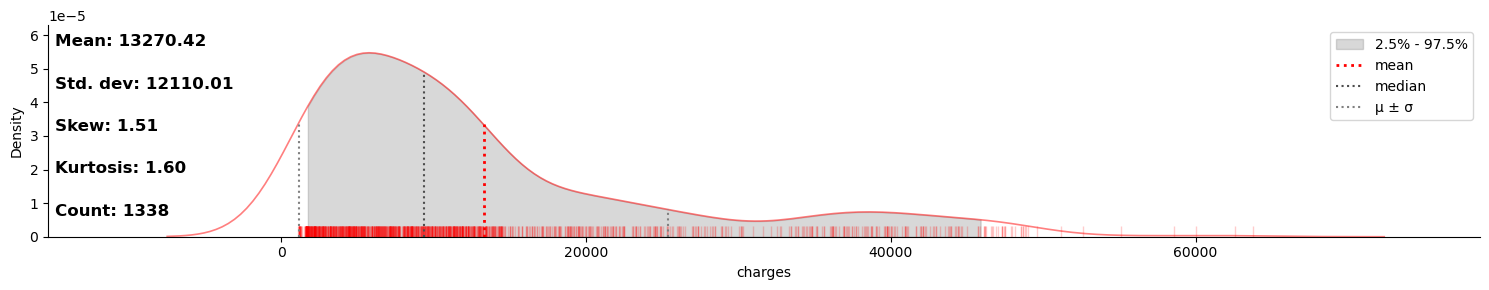

In [21]:
# Specify relevant colors for parameterable arguments
mean_color = 'red'
kde_kws = {'color': 'red', 'alpha': 0.5, 'linewidth': 1.2}
rug_kws = {'color': 'green', 'alpha': 0.2, 'lw': 2, 'height': 0.05}
fill_kws = {'color': 'grey', 'alpha': 0.3}
font_kws = {'color': 'black', 'weight': 'bold', 'size': 12}

# Plot the distribution with the specified colors
klib.dist_plot(data, mean_color=mean_color, kde_kws=kde_kws, rug_kws=rug_kws, fill_kws=fill_kws, font_kws=font_kws)

In [24]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'
# You can replace 'df' with the name of your DataFrame

# Randomly select between 0 and 10 entries as null in each feature
for column in data.columns:
    # Get the number of null values to be assigned (between 0 and 10)
    num_nulls = np.random.randint(0, 11)
    
    # Get random indices for null assignment
    random_indices = np.random.choice(data.index, size=num_nulls, replace=False)
    
    # Assign null values to the randomly selected entries
    data.loc[random_indices, column] = np.nan


GridSpec(6, 6)

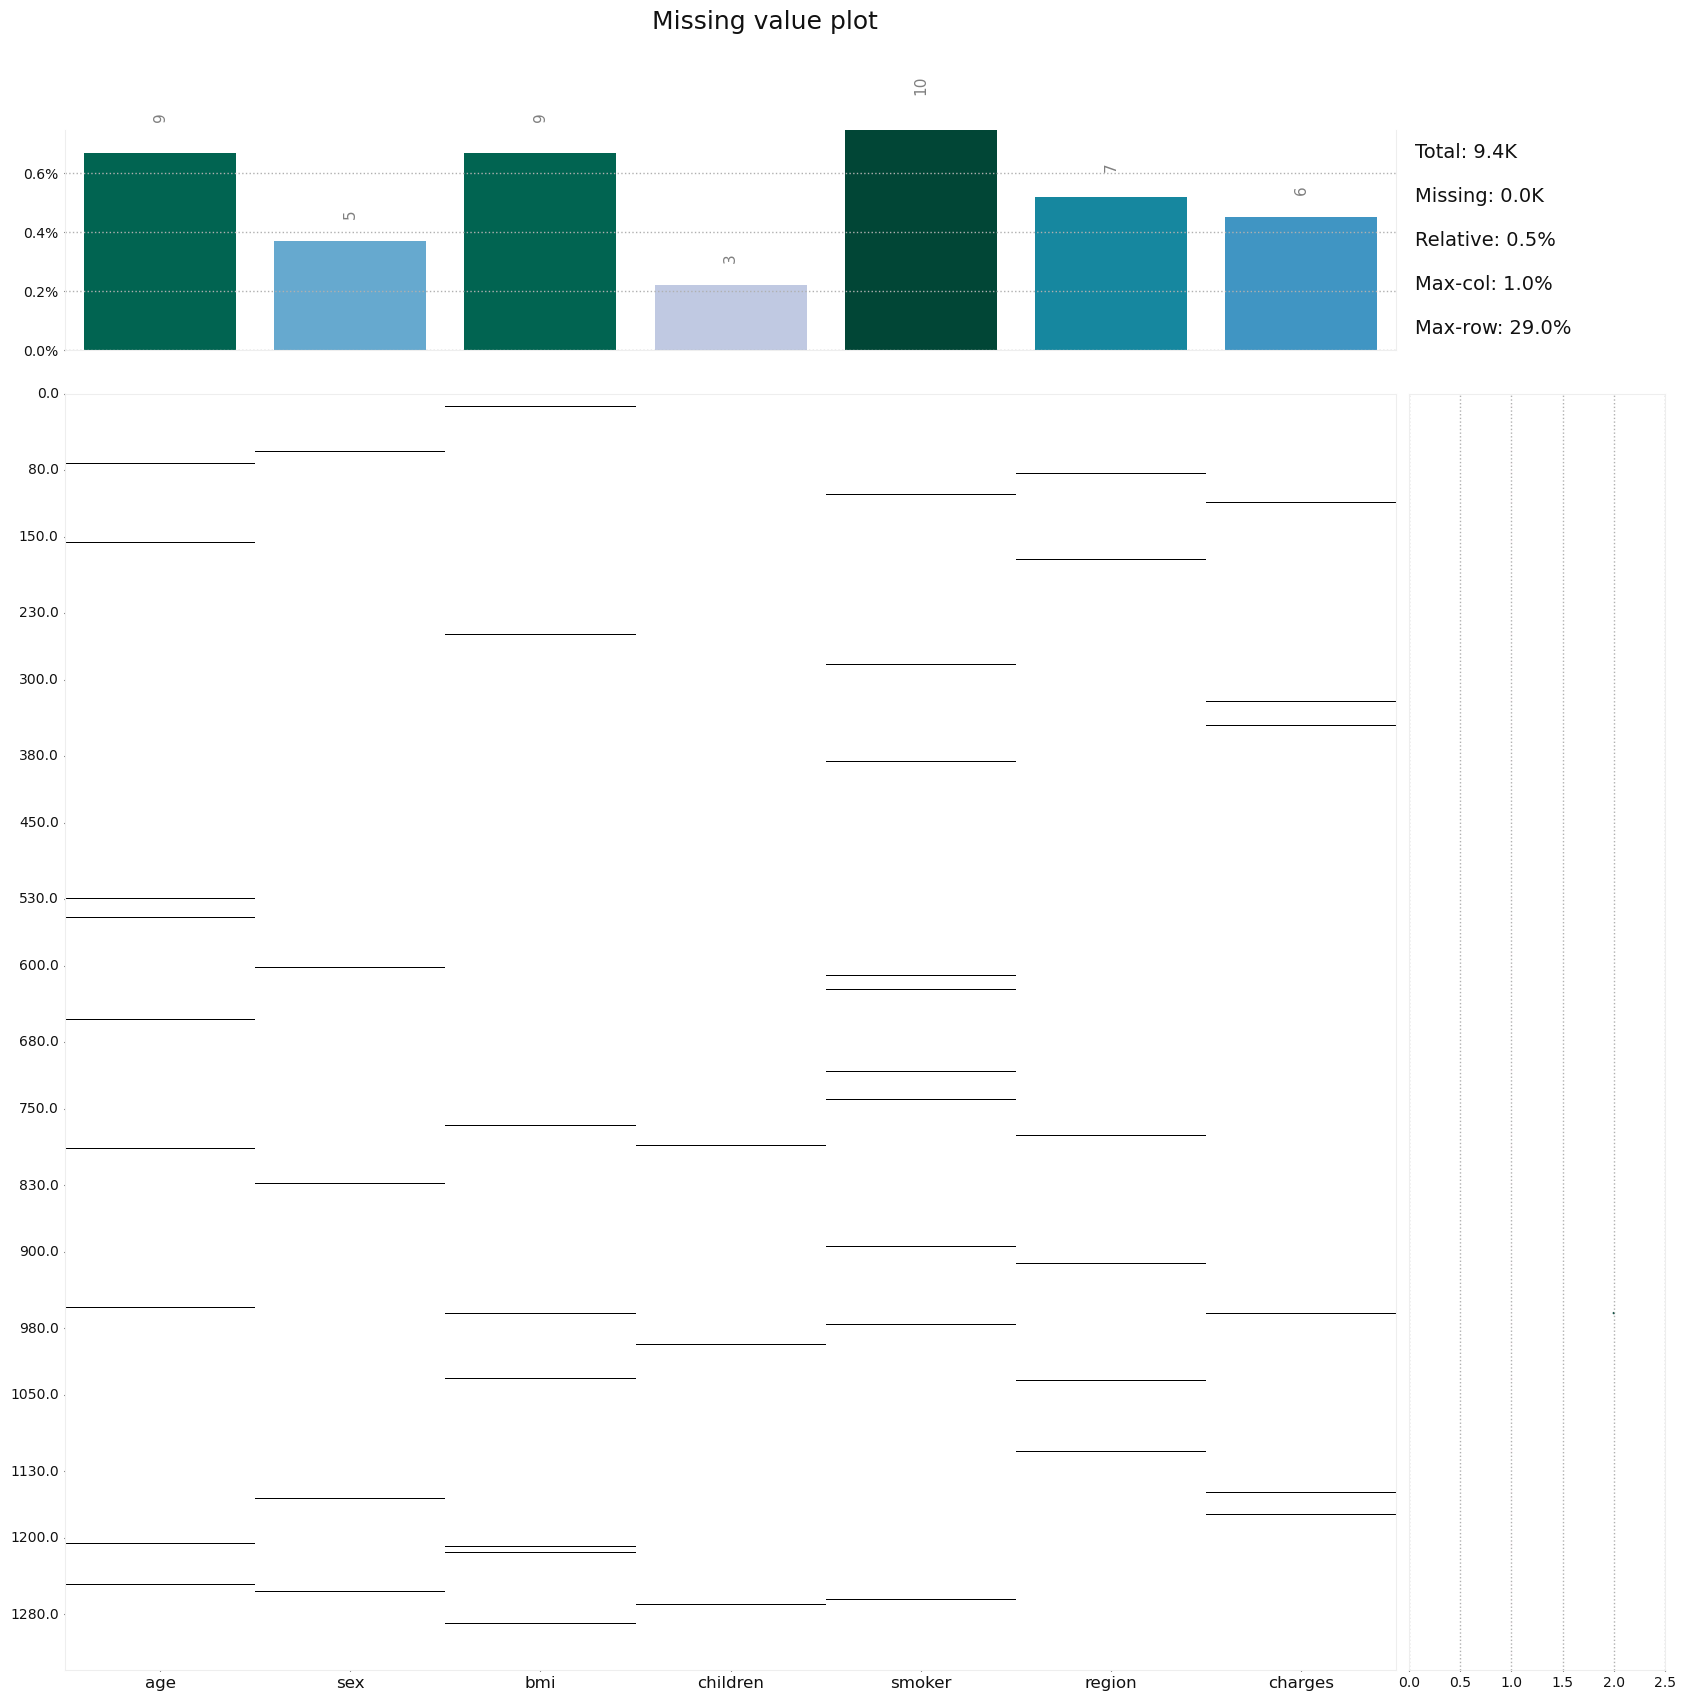

In [25]:
klib.missingval_plot(data)

In [26]:
klib.data_cleaning(data)

Shape of cleaned data: (1337, 7) - Remaining NAs: 49


Dropped rows: 1
     of which 1 duplicates. (Rows (first 150 shown): [581])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-57.14%)



,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900000,0.0,yes,southwest,16884.92400
1,18.0,male,33.770000,1.0,no,southeast,1725.55230
2,28.0,male,33.000000,3.0,no,southeast,4449.46200
3,33.0,male,22.705000,0.0,no,northwest,21984.47061
4,32.0,male,28.879999,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50.0,male,30.969999,3.0,no,northwest,10600.54830
1333,18.0,female,31.920000,0.0,no,northeast,2205.98080
1334,18.0,female,36.849998,0.0,no,southeast,1629.83350
1335,21.0,female,25.799999,0.0,no,southwest,2007.94500
